In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_csv('ml-1m/users.dat', sep='::', header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('ml-1m/ratings.dat', sep='::', header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_csv('ml-1m/movies.dat', sep='::', header=None, names=mnames, engine='python')

In [3]:
# merge ratings and users, then merge that result with movies data

In [4]:
data = pd.merge(pd.merge(ratings, users), movies)

In [5]:
# display the first 10 rows of the above dataset

In [6]:
data.head(10)

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,1193,4,978156168,F,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,1193,5,982730936,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,1193,5,978136709,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,1193,3,978125194,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama
9,33,1193,5,978557765,M,45,3,55421,One Flew Over the Cuckoo's Nest (1975),Drama


In [7]:
# Objective 1 - An aggregate of the movie ratings for each particular genre, e.g., Action, Adventure, Drama, 
# Science Fiction, ...

In [8]:
# first step is to separate out the genres for movies that have multiple genres
# reference: https://stackoverflow.com/a/50710385

In [9]:
separated_genre_data = data.set_index(data.columns.drop('genres',1).tolist()).genres.str.split('|', expand=True).stack().reset_index().rename(columns={0:'genres'}).loc[:, data.columns]


separated_genre_data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,1193,4,978156168,F,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,1193,5,982730936,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,1193,5,978136709,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,1193,3,978125194,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama
9,33,1193,5,978557765,M,45,3,55421,One Flew Over the Cuckoo's Nest (1975),Drama


In [10]:
# next step is to aggregate the movie ratings for each particular genre

In [11]:
mean_rating_by_genre = separated_genre_data.groupby('genres').agg({'rating': [np.mean]})

mean_rating_by_genre

,rating
,mean
genres,
Action,3.491185
Adventure,3.477257
Animation,3.684868
Children's,3.422035
Comedy,3.522099
Crime,3.708679
Documentary,3.933123
Drama,3.766332


In [12]:
# Objective 2 - The top 5 highest ranked genre by women.

In [13]:
# aggregate the movie ratings for each particular genre by gender

In [14]:
mean_rating_by_genre_and_gender = separated_genre_data.pivot_table('rating', index=['genres', 'gender'], aggfunc='mean')

mean_rating_by_genre_and_gender

rating
genres      gender          
Action      F       3.490252
            M       3.491386
Adventure   F       3.512879
            M       3.468125
Animation   F       3.744702
            M       3.661335
Children's  F       3.572548
            M       3.358961
Comedy      F       3.571938
            M       3.503667
Crime       F       3.689332
            M       3.713720
Documentary F       3.946392
            M       3.928811
Drama       F       3.765662
            M       3.766589
Fantasy     F       3.513076
            M       3.426603
Film-Noir   F       4.018087
            M       4.092254
Horror      F       3.202870
            M       3.217891
Musical     F       3.809108
            M       3.596332
Mystery     F       3.686548
            M       3.662009
Romance     F       3.673579
            M       3.573262
Sci-Fi      F       3.450255
            M       3.469952
Thriller    F       3.573360
            M       3.569685
War         F       3.893138
            M       3.893375
Western     F       3.551913
            M       3.655120

In [15]:
# top 5 highest ranked genre for women
# step one is to aggregate for only women

In [16]:
mean_rating_by_women = mean_rating_by_genre_and_gender.query('gender == ["F"]')

mean_rating_by_women[:10]

,,rating
genres,gender,
Action,F,3.490252
Adventure,F,3.512879
Animation,F,3.744702
Children's,F,3.572548
Comedy,F,3.571938
Crime,F,3.689332
Documentary,F,3.946392
Drama,F,3.765662
Fantasy,F,3.513076


In [17]:
# next step is to sort from highest to lowest

In [18]:
highest_women_ratings = mean_rating_by_women.sort_values(by='rating', ascending=False)

highest_women_ratings.head()

,,rating
genres,gender,
Film-Noir,F,4.018087
Documentary,F,3.946392
War,F,3.893138
Musical,F,3.809108
Drama,F,3.765662


In [19]:
# Objective 3 - The top 5 highest ranked genre by men.

In [20]:
# repeat the previous steps, but this time for men

In [21]:
mean_rating_by_men = mean_rating_by_genre_and_gender.query('gender == ["M"]')
                                                    
mean_rating_by_men[:10]

,,rating
genres,gender,
Action,M,3.491386
Adventure,M,3.468125
Animation,M,3.661335
Children's,M,3.358961
Comedy,M,3.503667
Crime,M,3.713720
Documentary,M,3.928811
Drama,M,3.766589
Fantasy,M,3.426603


In [22]:
# sort from highest to lowest

In [23]:
highest_men_ratings = mean_rating_by_men.sort_values(by='rating', ascending=False)

highest_men_ratings.head()

,,rating
genres,gender,
Film-Noir,M,4.092254
Documentary,M,3.928811
War,M,3.893375
Drama,M,3.766589
Crime,M,3.713720


In [24]:
# Objective 4 - Pick a movie of your choice and provide a breakdown of the movie’s ratings by 3
# age ranges (a) under 18 (b) 19 to 45 (c) Above 45.

In [25]:
# first step is to introduce bins and test if it is working properly

In [26]:
bins = [0,18,45,130]
group_names = ['under 18', '19-45', '46 plus']
separated_genre_data['age_group'] = pd.cut(separated_genre_data.age, bins, labels=group_names)

separated_genre_data[['age', 'age_group']]

,age,age_group
0,1,under 18
1,56,46 plus
2,25,19-45
3,25,19-45
4,50,46 plus
5,18,under 18
6,1,under 18
7,25,19-45
8,25,19-45
9,45,19-45


In [27]:
# apply it to a specific movie

In [28]:
by_age = separated_genre_data[separated_genre_data['movie_id']==1193].groupby(['title', 'age_group'])
by_age.rating.agg({'rating': np.mean})

D:\Tim\Games\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


rating
title                                  age_group          
One Flew Over the Cuckoo's Nest (1975) under 18   4.428070
                                       19-45      4.389456
                                       46 plus    4.356061

In [29]:
# Objective 4 - A function that given a user id and movie id , returns a list of user ids for other users that rated 
# the movie identified by the provided movie id with the same score.

In [30]:
def diff_users_same_rating(uid, mid):
    user_id_list = []
    select_row =  separated_genre_data[(separated_genre_data['user_id']==uid) & (separated_genre_data['movie_id']==mid)]
    user_rating = select_row.rating[0]
    select_users = separated_genre_data[(separated_genre_data['rating']==user_rating) & (separated_genre_data['movie_id']==mid)]
    return select_users.user_id

In [31]:
print(diff_users_same_rating(1,1193))

0          1
1          2
4         17
6         19
7         24
9         33
10        39
16        53
17        54
18        58
22        81
23        88
24        89
25        95
28       102
30       107
32       120
33       123
34       131
38       150
40       155
41       166
42       169
43       175
45       180
46       190
49       195
53       208
60       235
61       236
        ... 
1668    5859
1669    5865
1670    5868
1674    5888
1676    5890
1682    5911
1684    5917
1685    5920
1687    5924
1690    5942
1693    5948
1694    5949
1695    5950
1697    5954
1698    5956
1699    5958
1700    5962
1701    5964
1702    5965
1706    5975
1708    5977
1709    5978
1712    5986
1714    6001
1715    6002
1718    6021
1719    6032
1720    6033
1721    6035
1722    6036
Name: user_id, Length: 937, dtype: int64


In [32]:
# Objective 5 - Some other statistic, figure, aggregate, or plot that you created using this dataset,
# along with a short description of what interesting observations you derived from it.

In [ ]:
# parse the data set in order to find the most reviewed movies.

In [67]:
movies_by_title = separated_genre_data.groupby('title').size()
most_reviewed_movies = movies_by_title[movies_by_title > 1000]
top10_most_reviewed_movies = most_reviewed_movies.sort_values(ascending=False).head(10)

top10_most_reviewed_movies

title
Star Wars: Episode V - The Empire Strikes Back (1980)    14950
Star Wars: Episode VI - Return of the Jedi (1983)        14415
Star Wars: Episode IV - A New Hope (1977)                11964
Men in Black (1997)                                      10152
Princess Bride, The (1987)                                9272
L.A. Confidential (1997)                                  9152
E.T. the Extra-Terrestrial (1982)                         9076
Star Wars: Episode I - The Phantom Menace (1999)          9000
Alien (1979)                                              8096
Jurassic Park (1993)                                      8016
dtype: int64

In [ ]:
# The most reviewed movie is a simple yet important statistic to know when attempting to evaluate the popularity of a movie.
# While the number of reviews that a movie has isn't necessarily indicative of the movie's overall popularity (compare it to
# statistics like box office/number of copies sold), it's nevertheless still important. You could also use this statistic to 
# derive various other interesting ones such as for example, controversial movies, where you find some movies that have a lot
# of reviews but a low overall rating relative to its peers.

In [ ]:
# simple bar graph to display the results

Text(0.5, 0, 'Title')

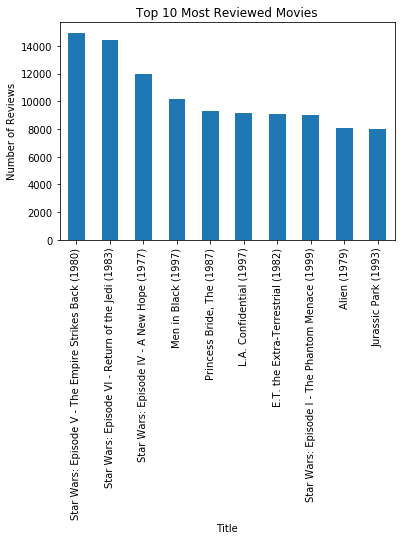

In [70]:
top10_most_reviewed_movies.plot(kind='bar')
plt.title('Top 10 Most Reviewed Movies')
plt.ylabel('Number of Reviews')
plt.xlabel('Title')

In [ ]:
# It's quite clear that the Star Wars franchise is by far and away the most reviewed movie franchise in this data set.
# I did find it interesting that the very first Star Wars movie in terms of release date (Star Wars Episode IV) had less reviews
# than its closest predecessors (V and VI). Further analysis would be needed, but I wonder if this is because its predecessors 
# continued to improve as the series progressed (a rarity when it comes to movie franchises, as I've always thought public opinion
# of movies progressively got worse and worse as the series' progress). Also, there is quite a noticeable dip in number of reviews
# when it comes to Star Wars Episode I. Again, further analysis is needed, but I wonder if this is due to the public being
# overall less interested in the movie as it is "out of order in the timeline", being released as "Episode I", 22 years after
# the first movie (Episode 4) was released. Star Wars aside, I wasn't surprised looking at this list of the top 10
# most reviewed movies as I recognized all of the movies. While not perfect, using the number of reviews a movie has is an
# alright tool to utilize to gain a rough understanding of what movies were/are "popular".